<a href="https://colab.research.google.com/github/Rakshit2909/Machine-Learning/blob/Diabetes-Dataset/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#for plotting
from matplotlib import pyplot as plt
#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# load method for splitting data
from sklearn.model_selection import train_test_split
#metrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#downloaded the dataset file from the given link in the pdf
#uploaded the file from the system using upload to storage session

#loading the data set in pandas dataframe
diabetes= pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Info of the dataset
diabetes.info()
#concluding it has 768 rows and 8 features giving one outcomme.... none of which is having a NULL value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
features= list(diabetes.columns)[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [5]:
# see data tail
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# describe data (data stats)
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#displaying correlation within data
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:

# make split (dataframe and series) (can also use numpy array)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(diabetes[features],diabetes['Outcome'],random_state=42,test_size=0.3,train_size=0.3)


In [9]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((230, 8), (231, 8), (230,), (231,))

In [10]:
# make model  (object)
regrss=LogisticRegression(max_iter=500)
machine= SVC(kernel='linear')
tree= DecisionTreeClassifier()

# make model train (fit) (calculated m and c (feature extraction))
regrss.fit(Xtrain,Ytrain)
machine.fit(Xtrain,Ytrain)
tree.fit(Xtrain,Ytrain)

# make evaluate model
print('Score (training): ',regrss.score(Xtrain,Ytrain))
print('Score (testing): ',regrss.score(Xtest,Ytest))

print('Score (training): ',machine.score(Xtrain,Ytrain))
print('Score (testing): ',machine.score(Xtest,Ytest))

print('Score (training): ',tree.score(Xtrain,Ytrain))
print('Score (testing): ',tree.score(Xtest,Ytest))

Score (training):  0.8130434782608695
Score (testing):  0.7229437229437229
Score (training):  0.8043478260869565
Score (testing):  0.7402597402597403
Score (training):  1.0
Score (testing):  0.7012987012987013


In [11]:
# make prediction (on all data)
diabetes['Prediction1']= regrss.predict(diabetes[features])
diabetes['Prediction2']= machine.predict(diabetes[features])

In [12]:
# see head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction1,Prediction2
0,6,148,72,35,0,33.6,0.627,50,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1,1


In [13]:
#see tail
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction1,Prediction2
763,10,101,76,48,180,32.9,0.171,63,0,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0,0
767,1,93,70,31,0,30.4,0.315,23,0,0,0


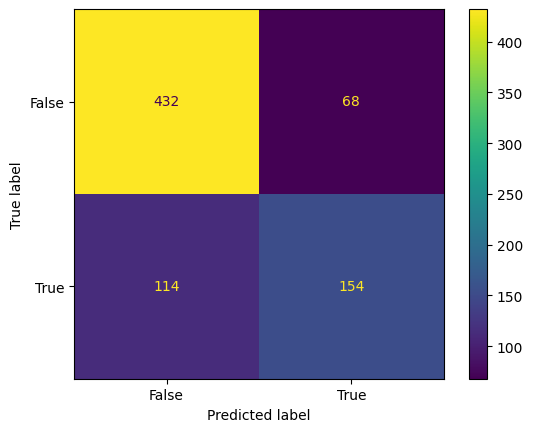

In [14]:
confusion_matrix = confusion_matrix(diabetes['Outcome'], diabetes['Prediction1'])

CM = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

CM.plot()
plt.show()

In [15]:
#score of DecisionTree on wole set
tree.score(diabetes[features],diabetes['Outcome'])

0.8033854166666666

In [16]:
# As all are giving best result on both training and testing data so we can use both as our models
#NOTE SVC would only give these results with 'linear' kernel.